In [2]:
from qiskit.primitives import Estimator

import scipy.linalg as ln

from povm_toolbox.library import *

from Ring import *

#### Setting the number of sites of the ring ($\equiv$ number of qubit used)

In [3]:
# Ring sites
n_spin = 4

# Creation of the system Hamiltonian as SparsePauliOp
H = build_hamiltonian(n_spin)

#### Generating the annealing circuit

In [4]:
# Number of trotter step -- each trotter step is 15-CNOT deep
n_tstep = 4

# Creation of the annealing circuit
circ = trotterized_annealing(n_spin, n_tstep)

### Retriving the excitation operators to be used in the Subspace Expansion

In [ ]:
# Excitaion operators
(op, n_op) = build_exitation_operators(n_spin)

### Allocating the POVM scheme

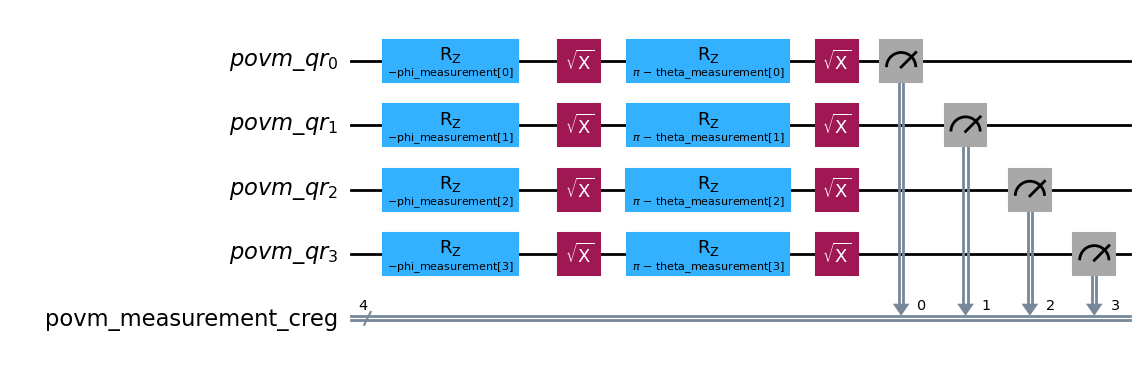

In [ ]:
# Allocating the POVMscheme to use for the expectation value estimation
POVM_scheme = ClassicalShadows(num_qubits=n_spin, measurement_twirl=False, shot_repetitions=1, seed=62)
POVM_scheme.measurement_circuit.draw("mpl")

#### Execution of the energy estimation throught a Krylov-like Subspace Expansion.
##### Call $|\psi\rangle$ the state obtained by the execution of the annealing circuit, then we build the space $\{\mathrm{I}|\psi\rangle, H|\psi\rangle, H^2|\psi\rangle\}$ and solve the generilized eigenvalue problem $$ \mathcal{H}\nu = \varepsilon\mathcal{S}\nu $$ where $\mathcal{H}_{i,j} = \langle\psi|H^{i+j+1}|\psi\rangle$ and $\mathcal{S}_{i,j} = \langle\psi|H^{i+j}|\psi\rangle$

In [ ]:
# Setting the maximum power of the Hamiltonian to use
max_pow = 2

# Retriving an energy estimation throught digitalized annealing + subspace expansion
estimate = energy_estimate_SbE(circ, H, op, POVM_scheme, max_pow, n_op)

#### Computing the exact ground state of the Hamiltonian

In [5]:
# Computing a numerical value of the system Hamiltonian
H_num = evaluate_hamiltonian(H)

# Numerical diagonalization of the Hamiltonian
e, V = ln.eigh(np.real(H_num), subset_by_index=[0, 0])

# Recuperiamo l'indice del groung state
id_gs = np.argmin(e)

# Recuperiamo il ground state e la relativa energia
gs     = V[:,id_gs]
energy = e[id_gs]

#### Comparison of the estimate from the Subspace Expansion with the exact (numerical) value of the ground state energy

In [ ]:
err = abs(energy - estimate) / abs(energy)
print([energy, estimate, err])